In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
from random import randint;
from time import time;

In [2]:
def load_images(path_to_images):
    images = np.fromfile(path_to_images, dtype=np.uint8, count= -1)[16:];
    return images;

def reshape_images(images):
    return images.reshape(-1, 28, 28);

def load_labels(path_to_labels):
    labels = np.fromfile(path_to_labels, dtype=np.uint8, count=-1)[8:];
    return labels;

In [3]:
training_images_filepath = "/content/train-images.idx3-ubyte";
training_labels_filepath = "/content/train-labels.idx1-ubyte";

test_images_filepath = "/content/t10k-images.idx3-ubyte";
test_labels_filepath = "/content/t10k-labels.idx1-ubyte";

x_train = load_images(training_images_filepath);
x_test = load_images(test_images_filepath);

y_train = load_labels(training_labels_filepath);
y_test = load_labels(test_labels_filepath);

x_train = reshape_images(x_train);
x_test = reshape_images(x_test);

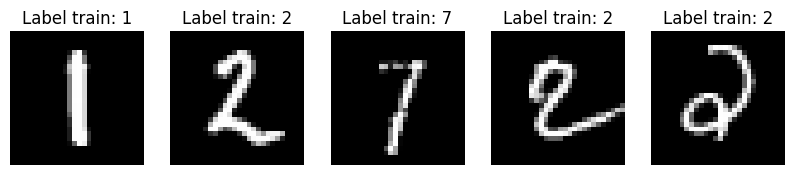

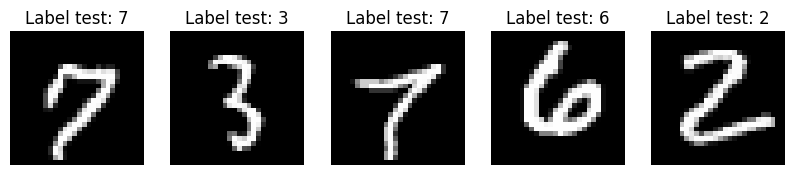

In [4]:
plt.figure(figsize=(10, 5));
for i in range(5):
    random_index_train = randint(1, 60000);
    plt.subplot(1, 5, i + 1);
    plt.imshow(x_train[random_index_train], cmap='gray');
    plt.title(f'Label train: {y_train[random_index_train]}');
    plt.axis('off');
plt.show();

plt.figure(figsize=(10, 5));
for i in range(5):
    random_index_test = randint(1, 10000);
    plt.subplot(1, 5, i + 1);
    plt.imshow(x_test[random_index_test], cmap='gray');
    plt.title(f'Label test: {y_test[random_index_test]}');
    plt.axis('off');
plt.show();

In [5]:
x_train = x_train.reshape(-1, 784);
x_test = x_test.reshape(-1, 784);

In [6]:
print(f"Размерность x_train: {x_train.shape}");
print(f"Размерность y_train: {y_train.shape}");
print("----------------------------------")
print(f"Размерность x_test: {x_test.shape}");
print(f"Размерность y_test: {y_test.shape}");

Размерность x_train: (60000, 784)
Размерность y_train: (60000,)
----------------------------------
Размерность x_test: (10000, 784)
Размерность y_test: (10000,)


In [7]:
x_train = x_train / 255;
x_test = x_test / 255;

In [8]:
y_test = np.eye(10)[y_test];
y_train = np.eye(10)[y_train];

In [9]:
def initialize_network_parameters(input_size, hidden_size, output_size):

    # He initialization
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size);

    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size);

    b1 = np.zeros((1, hidden_size));
    b2 = np.zeros((1, output_size));

    return W1, b1, W2, b2;

In [10]:
def Relu(Z):
    return np.maximum(Z, 0);

def Relu_derivative(Z):
    return Z > 0;

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True));
    A = exp_Z / np.sum(exp_Z, axis=1, keepdims=True);
    return A

def cross_entropy(Y, A2):
    L = A2.shape[0];
    return -np.sum(Y * np.log(A2 + 1e-9)) / L;

def accuracy(Y, A2):
  return np.mean(np.argmax(A2, axis = 1) == np.argmax(Y, axis = 1))

In [11]:
def forward_propagation(X, w1, b1, w2, b2):

    Z1 = np.dot(X, w1) + b1;
    A1 = Relu(Z1);

    Z2  = np.dot(A1, w2) + b2;
    A2 = softmax(Z2);

    return Z1, A1, Z2, A2;

def backward_propagation(X, Y, Z1, A1, Z2, A2,
                         w2):

    L = Y.shape[0];

    dZ2 = A2 - Y;

    dW2 = np.dot(A1.T, dZ2) / L;
    db2 = np.sum(dZ2, axis=0, keepdims=True) / L;

    dA1 = np.dot(dZ2, w2.T);
    dZ1 = dA1 * Relu_derivative(Z1);

    dW1 = np.dot(X.T, dZ1) / L;
    db1 = np.sum(dZ1, axis=0, keepdims=True) / L;

    return dW1, db1, dW2, db2;

def update_parameters_network(W1, b1, W2, b2,
                              dW1, db1, dW2, db2, alpha):

    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    return W1, b1, W2, b2

In [12]:
def train_network(x_train, y_train, x_test, y_test,
                  input_layer_size, hiiden_layer_size, output_layer_size,
                  count_epoch, batch_size, alpha):

    W1, b1, W2, b2 = initialize_network_parameters(input_layer_size,
                            hiiden_layer_size, output_layer_size);

    length_X_train = x_train.shape[0];

    for epoch in range(count_epoch):

        time_start = time();
        shuffle = np.random.permutation(length_X_train)
        x_train_shuffled = x_train[shuffle]
        y_train_shuffled = y_train[shuffle]

        for batch in range(0, length_X_train, batch_size):

            x_batch = x_train_shuffled[batch:batch+batch_size]
            y_batch = y_train_shuffled[batch:batch+batch_size]

            Z1, A1, Z2, A2 = forward_propagation(x_batch, W1, b1, W2, b2);

            dW1, db1, dW2, db2 = backward_propagation(x_batch, y_batch,
                        Z1, A1, Z2, A2, W2);

            W1, b1, W2, b2 = update_parameters_network(W1, b1, W2, b2,
                              dW1, db1, dW2, db2, alpha);

        _, _, _ , A2_train = forward_propagation(x_train, W1, b1, W2, b2);

        loss = cross_entropy(y_train, A2_train);
        accuracy_train = accuracy(A2_train, y_train)

        time_end = time();

        print(f"Epoch: {epoch}; time in epoch: {time_end - time_start: .2f} s.; loss: {loss: .4f}; accuracy train: {accuracy_train: .4f};")
        print("----------------------------------------------------------------")

    _, _, _, A2_test = forward_propagation(x_test, W1, b1, W2, b2);
    accuracy_test = accuracy(A2_test, y_test);

    print("");
    print(f"accuracy test: {accuracy_test: .4f}");

In [13]:
input_layer_size = 784;
hidden_layer_size = 300;
outputsize = 10;
count_epoch = 20;
batch_size = 32;
alpha = 0.1;

train_network(x_train, y_train, x_test, y_test,
                  input_layer_size, hidden_layer_size, outputsize,
                  count_epoch, batch_size, alpha);

Epoch: 0; time in epoch:  19.97 s.; loss:  0.1565; accuracy train:  0.9566;
----------------------------------------------------------------
Epoch: 1; time in epoch:  8.59 s.; loss:  0.0990; accuracy train:  0.9726;
----------------------------------------------------------------
Epoch: 2; time in epoch:  9.46 s.; loss:  0.0733; accuracy train:  0.9799;
----------------------------------------------------------------
Epoch: 3; time in epoch:  7.79 s.; loss:  0.0605; accuracy train:  0.9828;
----------------------------------------------------------------
Epoch: 4; time in epoch:  8.04 s.; loss:  0.0459; accuracy train:  0.9877;
----------------------------------------------------------------
Epoch: 5; time in epoch:  9.07 s.; loss:  0.0373; accuracy train:  0.9907;
----------------------------------------------------------------
Epoch: 6; time in epoch:  7.74 s.; loss:  0.0332; accuracy train:  0.9918;
----------------------------------------------------------------
Epoch: 7; time in e